# Predictive Analysis - House Sales in King County, USA (2014-2015)

This notebook aims to predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors and so on. The steps in approaching a dataset are shared here from data wrangling, exploratory data analysis, model development to model evaluation and refinement. 

The dataset used contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

This notebook is a work in progress. I will be updating this notebook anytime as I add more visualizations and apply other statistical methods.

The required libraries for this project are found below:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 1. Importing Data Sets 

 Load the csv:  

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

### Column Headers
I use the attribute dtype to neatly display all the headers and the data types of each column.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2. Data Wrangling

### Removing unncessary columns 
Dropping the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then used the method <code>describe()</code> to obtain a statistical summary of the data.

In [10]:
dfclean=df.drop(['id', 'Unnamed: 0'], axis = 1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dealing with missing values

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10



We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.

In [12]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>.

In [13]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# 3. Exploratory Data Analysis

### Question: How many floors do most houses have?
Using the method <code>value_counts</code> to count the number of houses with unique floor values, then the method <code>.to_frame()</code> to convert it to a dataframe.


In [15]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question :  Do houses with a waterfront view or without a waterfront view have more price outliers?
Using the function <code>boxplot</code> in the seaborn library.

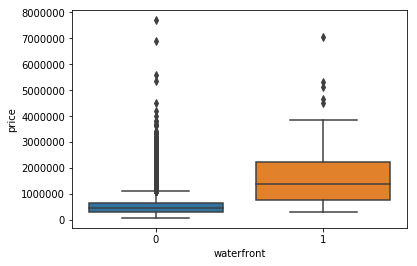

In [16]:
sns.boxplot(x="waterfront", y="price", data=df)

### Question : How does size of the house impact price?
Using the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0, 8086177.388580191)

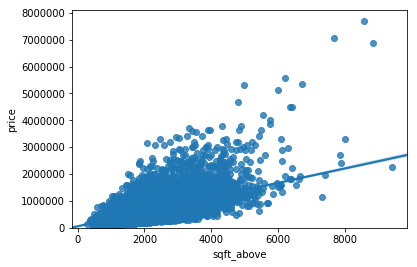

In [17]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

### Question : What are the other features impacting price?
Using the Pandas method <code>corr()</code> to find features other than price that is most correlated with price.

From the results below we can see that sqft_living has the strongest positive relationship while zipcode is the only feature showing negative relationship.

In [18]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# 4. Model Development

### Model 1 - Single Linear Regression
Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculating the R^2.

In [20]:
X = df[['sqft_living']]
Y = df['price']
lm_sqft= LinearRegression()
lm_sqft.fit(X,Y)

print("The value of R^2 is",lm_sqft.score(X, Y))

The value of R^2 is 0.49285321790379316


### Model 2 - Multiple Linear Regression
Fitting a linear regression model to predict the <code>'price'</code> using the list of features:

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculating the R^2.

In [24]:
X=df[features]
y=df.price
lr=LinearRegression()
lr.fit(X,y)
print("The value of R^2 is",lr.score(X,y))

The value of R^2 is 0.657679183672129


### Using a Pipeline

In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Using the list to create a pipeline object to predict the 'price', fitting the object using the features in the list <code>features</code>, and calculating the R^2.

In [27]:
pipe =Pipeline(Input)
pipe.fit(X,y)
print("The value of R^2 is",pipe.score(X,y))


The value of R^2 is 0.7513408553309376


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# 5. Model Evaluation and Refinement

Importing the necessary modules:

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Splitting the data into training and testing sets:

In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Using Ridge Regression
Creating and fitting a Ridge regression object using the training data with regularization parameter to 0.1. Calculating the R^2 using the test data. 


In [30]:
from sklearn.linear_model import Ridge

In [31]:
rm=Ridge(alpha=0.1)
rm.fit(x_train, y_train)
rm.score(x_test, y_test)

0.6478759163939121

Performing a second order polynomial transform on both the training data and testing data. Creating and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [32]:
#Second order polynomial transform
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

#Ridge Regression
ridge_pr = Ridge(alpha=0.1)
ridge_pr.fit(x_train_pr, y_train)
ridge_pr.score(x_test_pr, y_test)

0.7002744279699229